In [1]:
!pip install gensim spacy

     ---------------------------------------- 0.0/90.6 kB ? eta -:--:--
     ------------------------------------ --- 81.9/90.6 kB 2.3 MB/s eta 0:00:01
     ---------------------------------------- 90.6/90.6 kB 1.3 MB/s eta 0:00:00
  Using cached annotated_types-0.7.0-py3-none-any.whl.metadata (15 kB)
  Using cached typing_inspection-0.4.2-py3-none-any.whl.metadata (2.6 kB)
     ---------------------------------------- 0.0/59.0 kB ? eta -:--:--
     ---------------------------------------- 59.0/59.0 kB 3.0 MB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
   ---------------------------------------- 0.0/15.3 MB ? eta -:--:--
   ---------------------------------------- 0.1/15.3 MB 4.3 MB/s eta 0:00:04
    --------------------------------------- 0.3/15.3 MB 3.2 MB/s eta 0:00:05
   - --------------------------------------

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
anaconda-cloud-auth 0.1.4 requires pydantic<2.0, but you have pydantic 2.12.5 which is incompatible.
mljar-scikit-plot 0.3.10 requires scipy>=1.11.4, but you have scipy 1.10.1 which is incompatible.
mljar-supervised 1.1.7 requires pandas>=2.0.0, but you have pandas 1.5.3 which is incompatible.


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
import nltk
import spacy

In [4]:
!python -m spacy download en_core_web_sm


     ---------------------------------------- 0.0/12.8 MB ? eta -:--:--
     ---------------------------------------- 0.0/12.8 MB ? eta -:--:--
     ---------------------------------------- 0.0/12.8 MB ? eta -:--:--
     ---------------------------------------- 0.0/12.8 MB ? eta -:--:--
     --------------------------------------- 0.0/12.8 MB 217.9 kB/s eta 0:00:59
     --------------------------------------- 0.0/12.8 MB 195.7 kB/s eta 0:01:06
     --------------------------------------- 0.1/12.8 MB 655.8 kB/s eta 0:00:20
     - -------------------------------------- 0.6/12.8 MB 2.3 MB/s eta 0:00:06
     --- ------------------------------------ 1.0/12.8 MB 3.4 MB/s eta 0:00:04
     ---- ----------------------------------- 1.4/12.8 MB 3.8 MB/s eta 0:00:03
     ----- ---------------------------------- 1.9/12.8 MB 4.7 MB/s eta 0:00:03
     ------- -------------------------------- 2.4/12.8 MB 5.2 MB/s eta 0:00:03
     -------- ------------------------------- 2.8/12.8 MB 5.6 MB/s eta 0:00:0

In [5]:
from gensim.corpora import Dictionary
from gensim.models.ldamodel import LdaModel
from gensim.models.coherencemodel import CoherenceModel

nlp = spacy.load("en_core_web_sm")

# Download stopwords
nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Prath\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [6]:
df = pd.read_csv("Low_Artists.csv")  # or "Top_Artists.csv"
df = df.dropna(subset=['Lyrics'])
df.head()


,SongName,AlbumName,AlbumLink,Year,PlayCount,Lyrics,SongLink,Duration,artist
0,$copie,$O$,https://open.spotify.com/album/7Ja0MmZhnVdFjs5...,2010,4606632,"Ho$h, kykie kinders!\r\nOns gaan mos nou lekke...",https://open.spotify.com/track/2rTjC1PYwenrBbA...,192,DieAntwoord
1,2•GOLDEN DAWN•7,2•GOLDEN DAWN•7,https://open.spotify.com/album/3kOlbclgj0Gglpz...,2018,6421323,"I've seen it all\r\nFace carved out of stone, ...",https://open.spotify.com/track/24JZqWlglnEfqYU...,289,DieAntwoord
2,Age Of Illusion,Age Of Illusion,https://open.spotify.com/album/56zia7byXUEiTcm...,2022,5273751,It's the Age of Illusion\r\nThe Age of Illusio...,https://open.spotify.com/track/5jjH6vi22zsOAV2...,261,DieAntwoord
3,Alien,Mount Ninji And Da Nice Time Kid,https://open.spotify.com/album/4FrKhXf6FmfUjTy...,2016,17927575,I am a alien\r\n♪\r\nNo matter how hard I try ...,https://open.spotify.com/track/2P8wndZLW1QnByi...,256,DieAntwoord
4,Baby's On Fire,Ten$ion,https://open.spotify.com/album/3FJydX4zwGGNIwl...,2012,144680835,Baby's on fire!\r\nBoom!\r\nBoom-boom!\r\nShow...,https://open.spotify.com/track/6mlGXuG5FmzcePH...,236,DieAntwoord


In [7]:
def preprocess(text):
    text = text.lower()
    text = re.sub(r'[^a-z\s]', ' ', text)

    doc = nlp(text)
    tokens = []

    for token in doc:
        if token.is_stop:
            continue
        if token.lemma_ == "-PRON-":
            continue
        if len(token.lemma_) < 3:
            continue
        tokens.append(token.lemma_)
    
    return tokens


In [8]:
texts = df['Lyrics'].astype(str).apply(preprocess).tolist()
texts[:2]


[['kykie',
  'kinder',
  'ons',
  'gaan',
  'mos',
  'nou',
  'lekker',
  'naai',
  ' \r\n',
  'get',
  'want',
  'boy',
  'get',
  'want',
  'get',
  'want',
  'boy',
  'get',
  'want',
  'boy',
  'get',
  'want',
  'forget',
  'ninja',
  'innie',
  'moederfokken',
  'huisie',
  'zone',
  'duk',
  'meisie',
  'hello',
  'baby',
  'kiss',
  'kiss',
  'soen',
  'kykie',
  'hoesit',
  'kan',
  'piel',
  'binne',
  'jou',
  'poe',
  'sit',
  'roll',
  'poe',
  'koel',
  'status',
  'zoning',
  'boning',
  'rap',
  'fantasy',
  'real',
  'life',
  'touch',
  'feel',
  'rush',
  'wys',
  'rip',
  'bass',
  'trip',
  'face',
  'laced',
  'phrase',
  'daze',
  'rap',
  'rave',
  'grave',
  'sinne',
  'binne',
  'vat',
  'vyf',
  'piel',
  'styf',
  'binne',
  'jou',
  'lyf',
  'ninja',
  'play',
  'game',
  'vat',
  'kans',
  'fuckin',
  'rhyme',
  'trance',
  'skud',
  'jou',
  'boude',
  'skud',
  'skud',
  'jou',
  'boude',
  'hope',
  'like',
  'hole',
  ' \r\n',
  'get',
  'want',
  'boy

In [9]:
dictionary = Dictionary(texts)
corpus = [dictionary.doc2bow(text) for text in texts]


In [10]:
def train_gensim_lda(k):
    lda_model = LdaModel(
        corpus=corpus,
        id2word=dictionary,
        num_topics=k,
        passes=10,
        random_state=42
    )
    return lda_model


In [12]:
def compute_coherence(model):
    coherence_model = CoherenceModel(
        model=model,
        texts=texts,
        dictionary=dictionary,
        coherence='c_v'
    )
    return coherence_model.get_coherence()


In [13]:
topic_nums = [2, 4, 5, 7, 10, 12, 15]
coherence_scores = []

for k in topic_nums:
    lda_k = train_gensim_lda(k)
    coh = compute_coherence(lda_k)
    coherence_scores.append((k, coh))
    print(f"K={k}, Coherence={coh}")


K=2, Coherence=0.3244512129079107
K=4, Coherence=0.3434215535784164
K=5, Coherence=0.3390947230803245
K=7, Coherence=0.3314278156343976
K=10, Coherence=0.32560076707824964
K=12, Coherence=0.32966682117430995
K=15, Coherence=0.34221363262805066


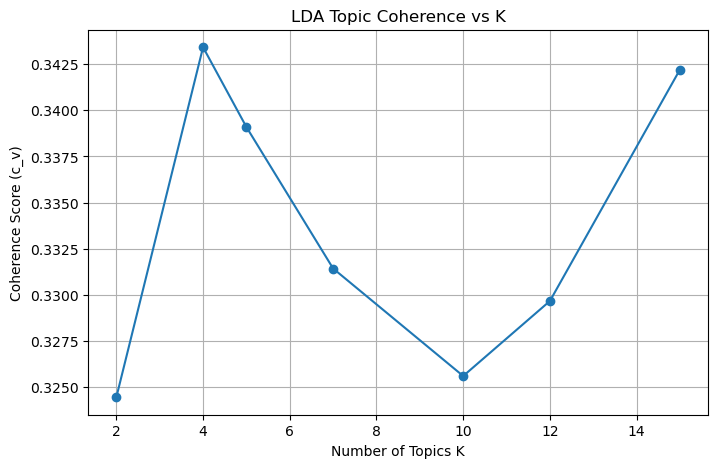

In [14]:
ks = [x[0] for x in coherence_scores]
scores = [x[1] for x in coherence_scores]

plt.figure(figsize=(8,5))
plt.plot(ks, scores, marker='o')
plt.xlabel("Number of Topics K")
plt.ylabel("Coherence Score (c_v)")
plt.title("LDA Topic Coherence vs K")
plt.grid(True)
plt.show()


In [15]:
best_k = max(coherence_scores, key=lambda x: x[1])
print("Best number of topics (K):", best_k[0], "with coherence:", best_k[1])


Best number of topics (K): 4 with coherence: 0.3434215535784164
